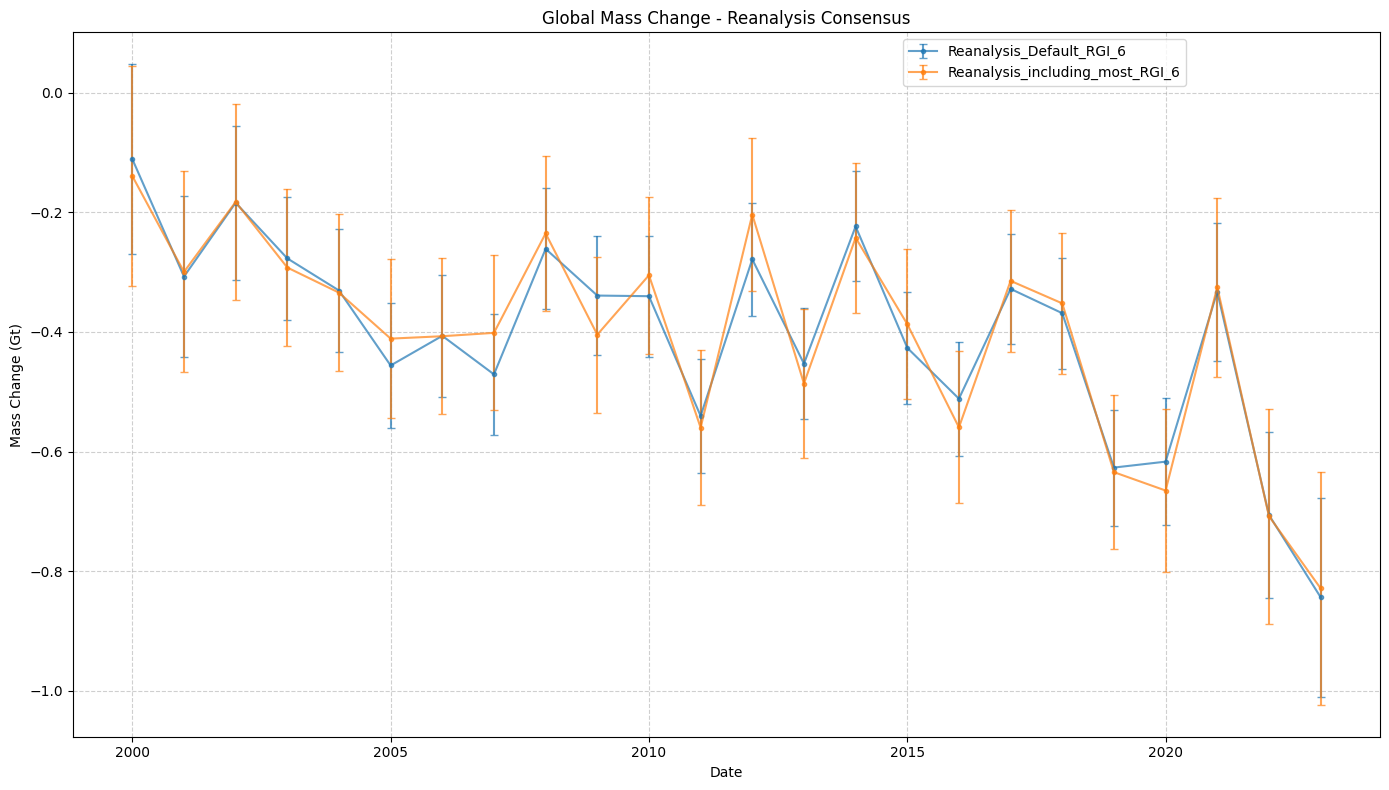

In [5]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Define the search pattern relative to the current notebook directory
# search_pattern = os.path.join('.', 'Reanalysis*', '1_alaska', 'consensus', 'csvs', 'global_gt.csv')
search_pattern = os.path.join('.', 'Reanalysis*', '0_*', 'consensus', 'csvs', 'global_mwe.csv')

csv_files = glob.glob(search_pattern)

plt.figure(figsize=(14, 8))

for csv_file in csv_files:
    try:
        # Read the CSV file
        df = pd.read_csv(csv_file)
        
        # Identify columns based on prompt description
        # Looking for 'dates' (or similar), 'changes', and 'errors'
        date_col = next((c for c in df.columns if 'date' in c.lower()), df.columns[0])
        change_col = next((c for c in df.columns if 'change' in c.lower()), None)
        error_col = next((c for c in df.columns if 'error' in c.lower()), None)
        
        if change_col and error_col:
            # Extract the Reanalysis folder name for the legend
            # Path structure example: .\Reanalysis_Name\0_global\consensus\csvs\global_gt.csv
            path_parts = os.path.normpath(csv_file).split(os.sep)
            # Find the part starting with Reanalysis
            label = next((part for part in path_parts if part.startswith('Reanalysis')), 'Unknown')
            
            # Plot with error bars
            plt.errorbar(df[date_col], df[change_col], yerr=df[error_col], 
                         label=label, fmt='.-', capsize=3, alpha=0.7)
        else:
            print(f"Columns not found in {csv_file}. Available: {df.columns}")

    except Exception as e:
        print(f"Could not process {csv_file}: {e}")

plt.title('Global Mass Change - Reanalysis Consensus')
plt.xlabel('Date')
plt.ylabel('Mass Change (Gt)')
plt.legend(bbox_to_anchor=(0.63, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Loop

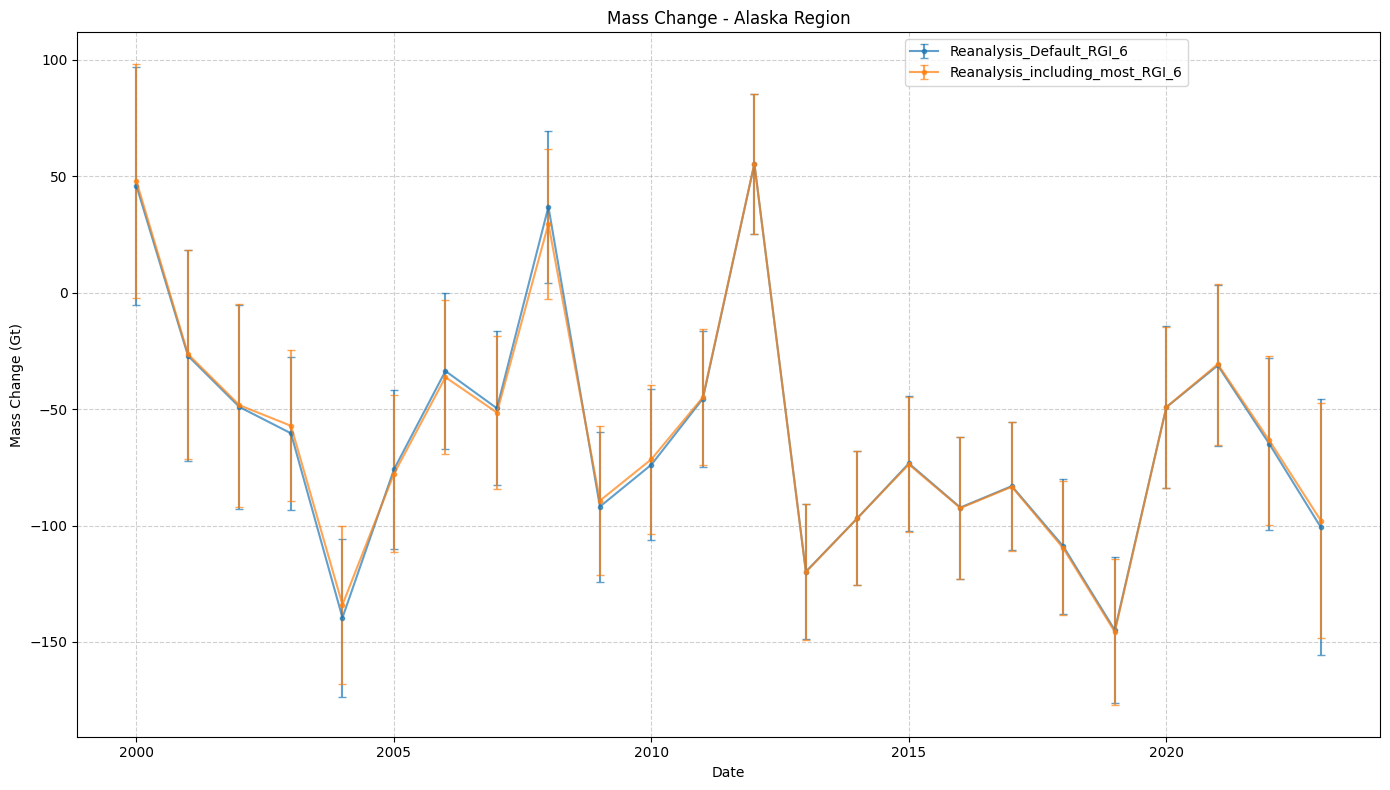

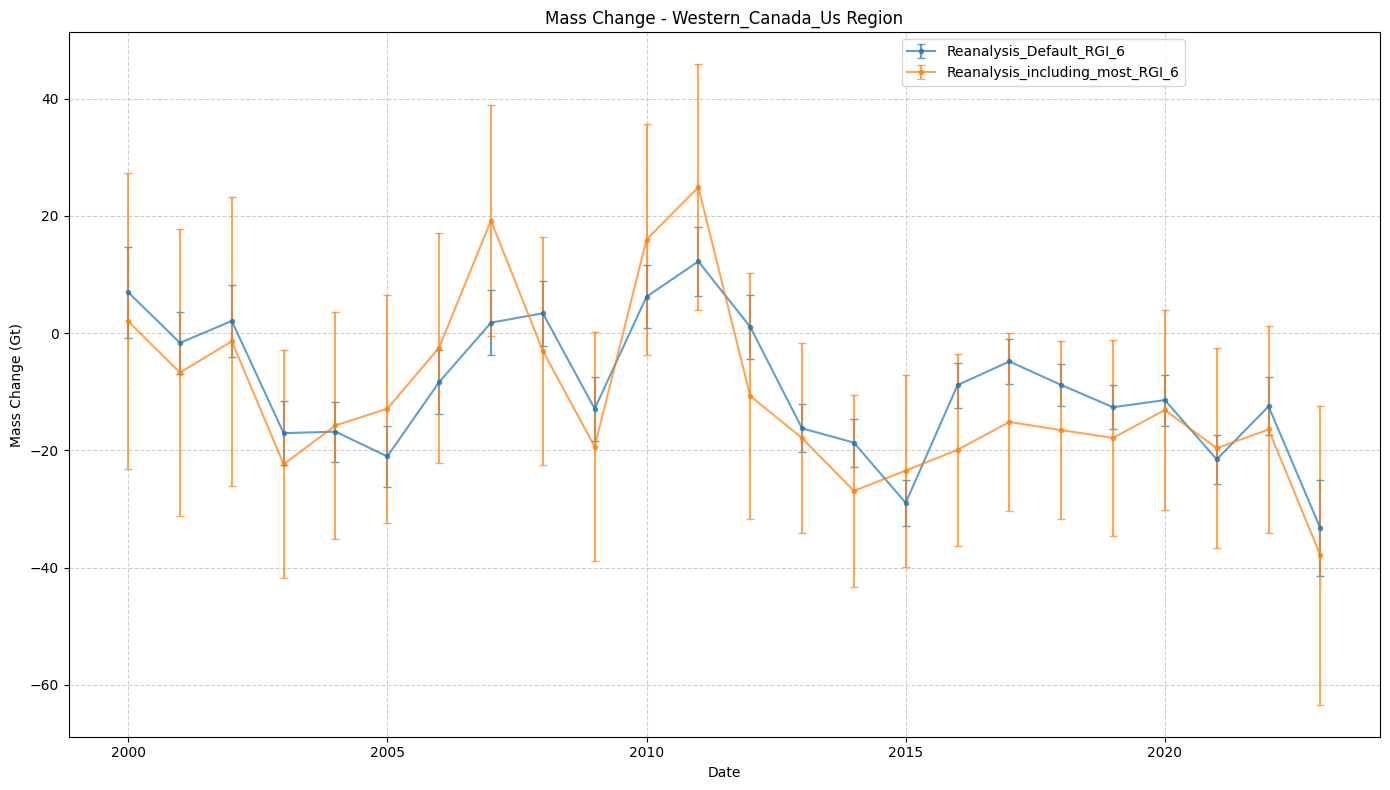

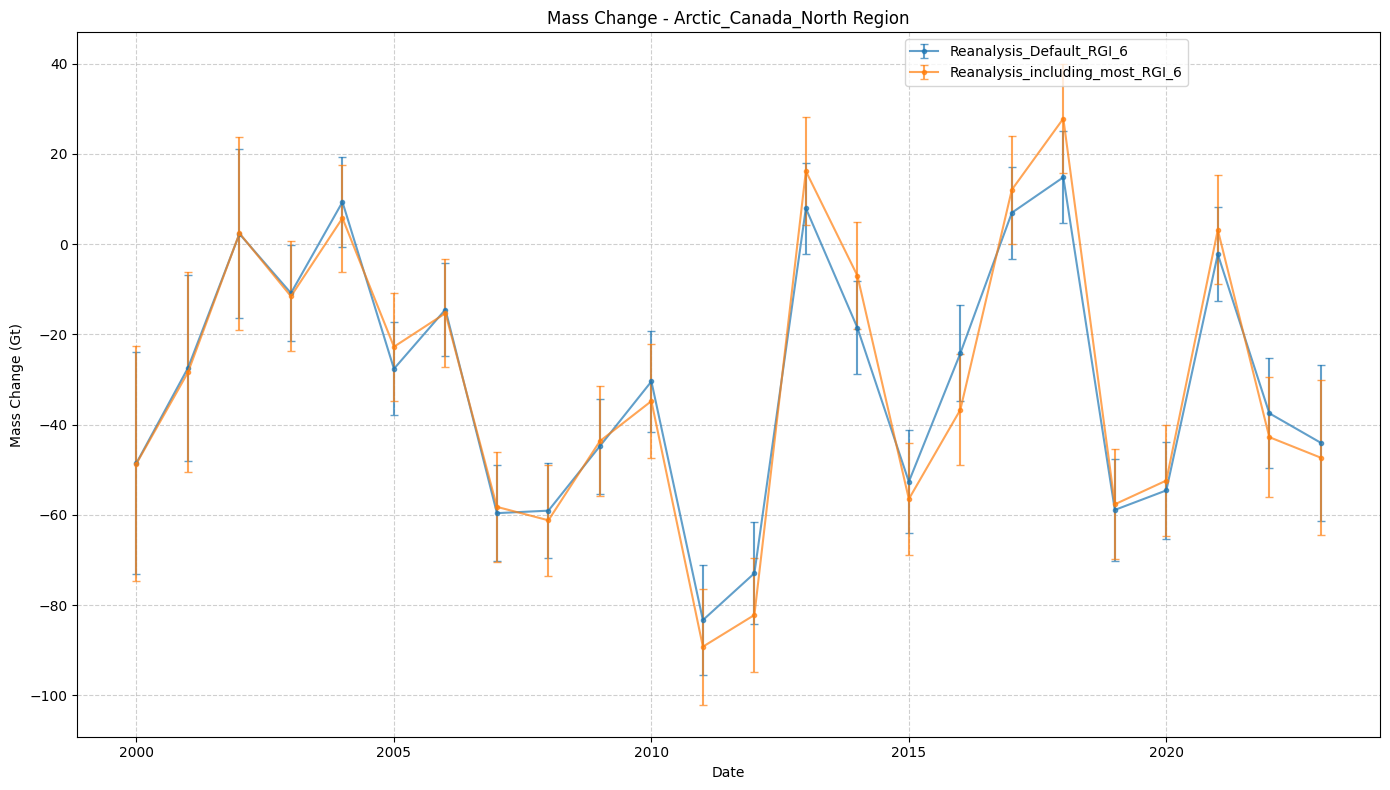

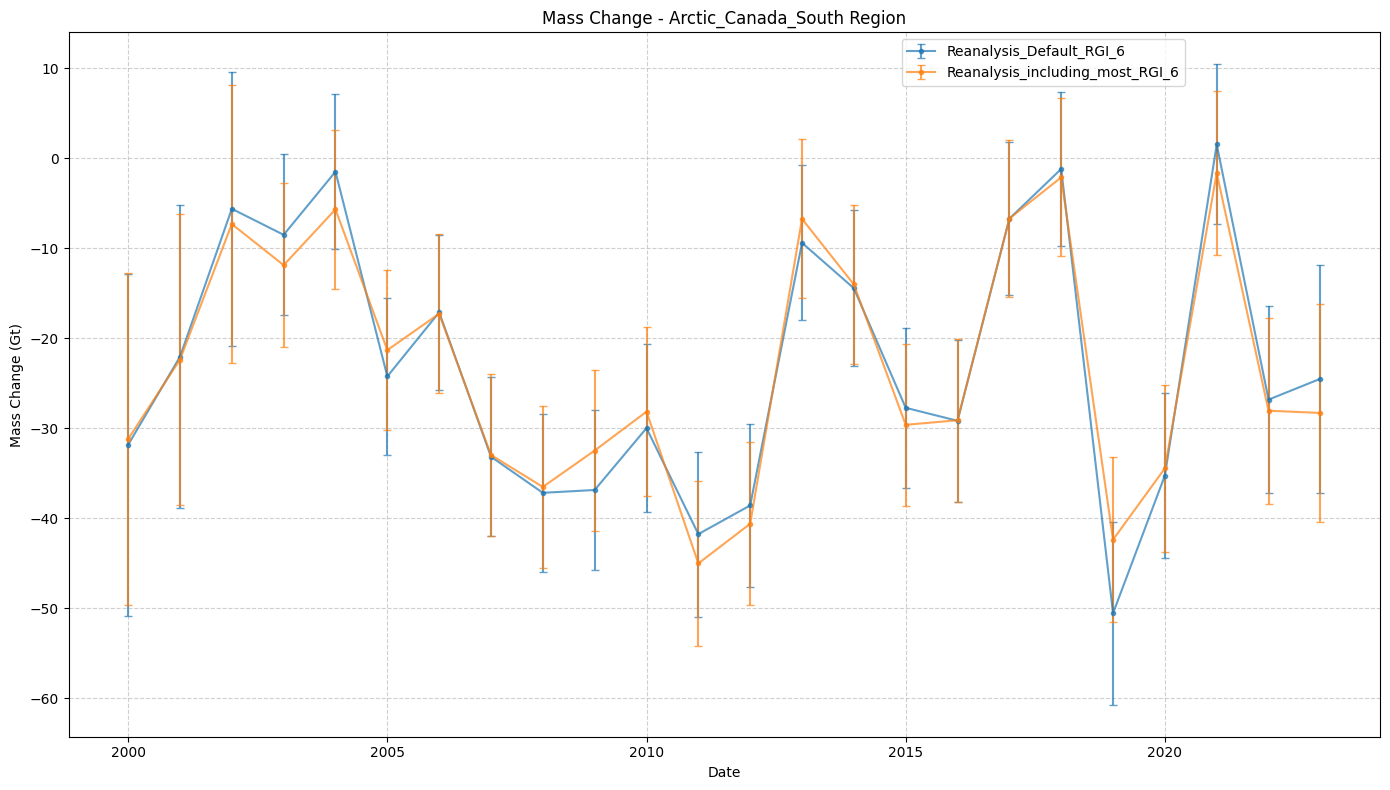

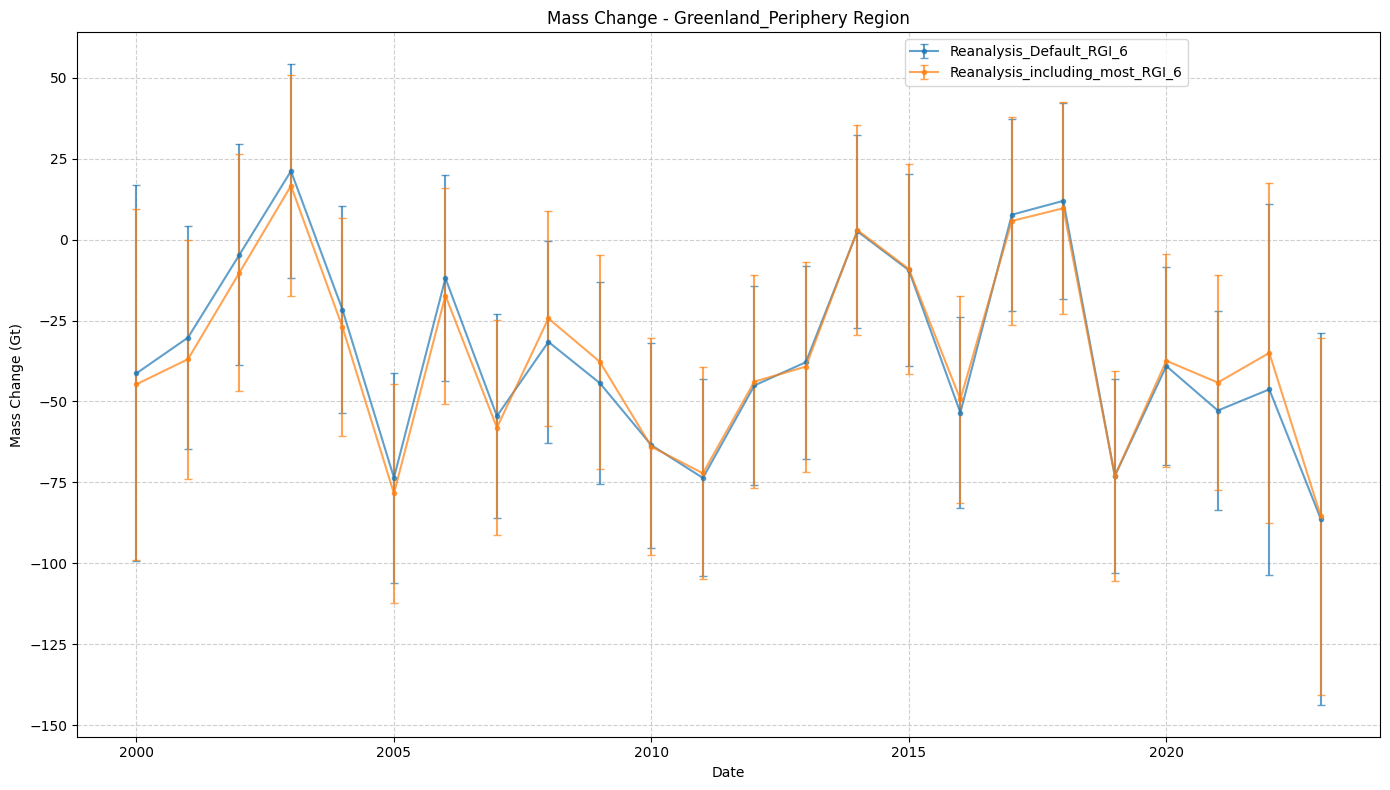

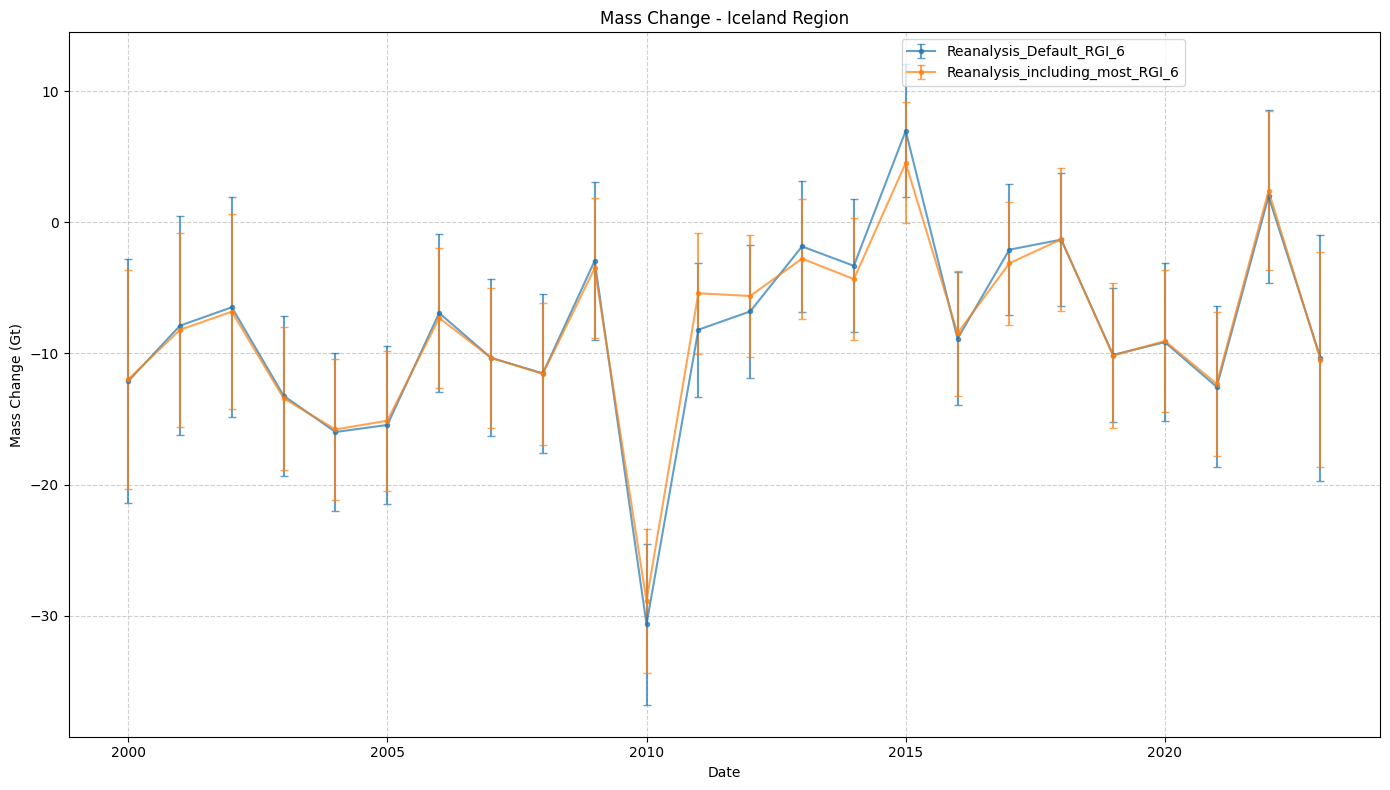

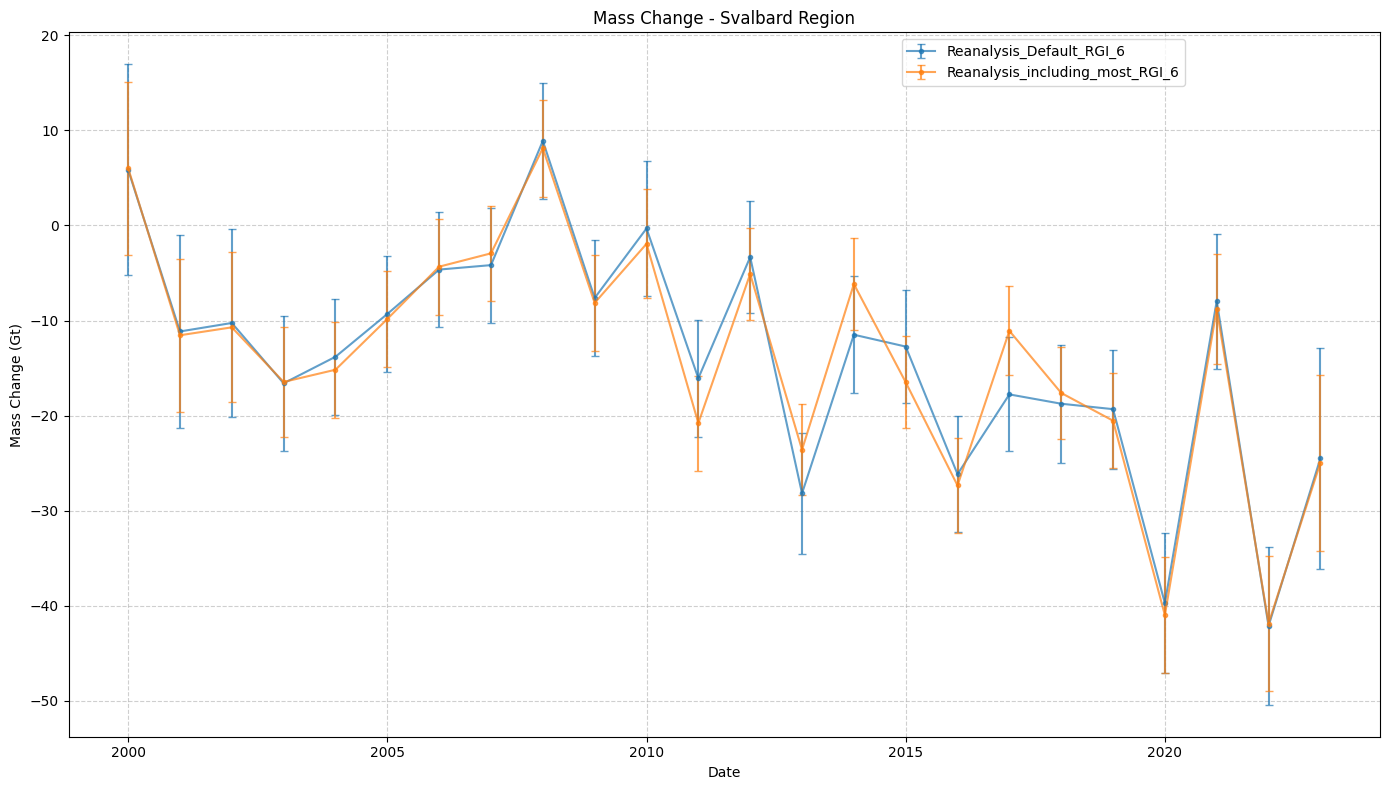

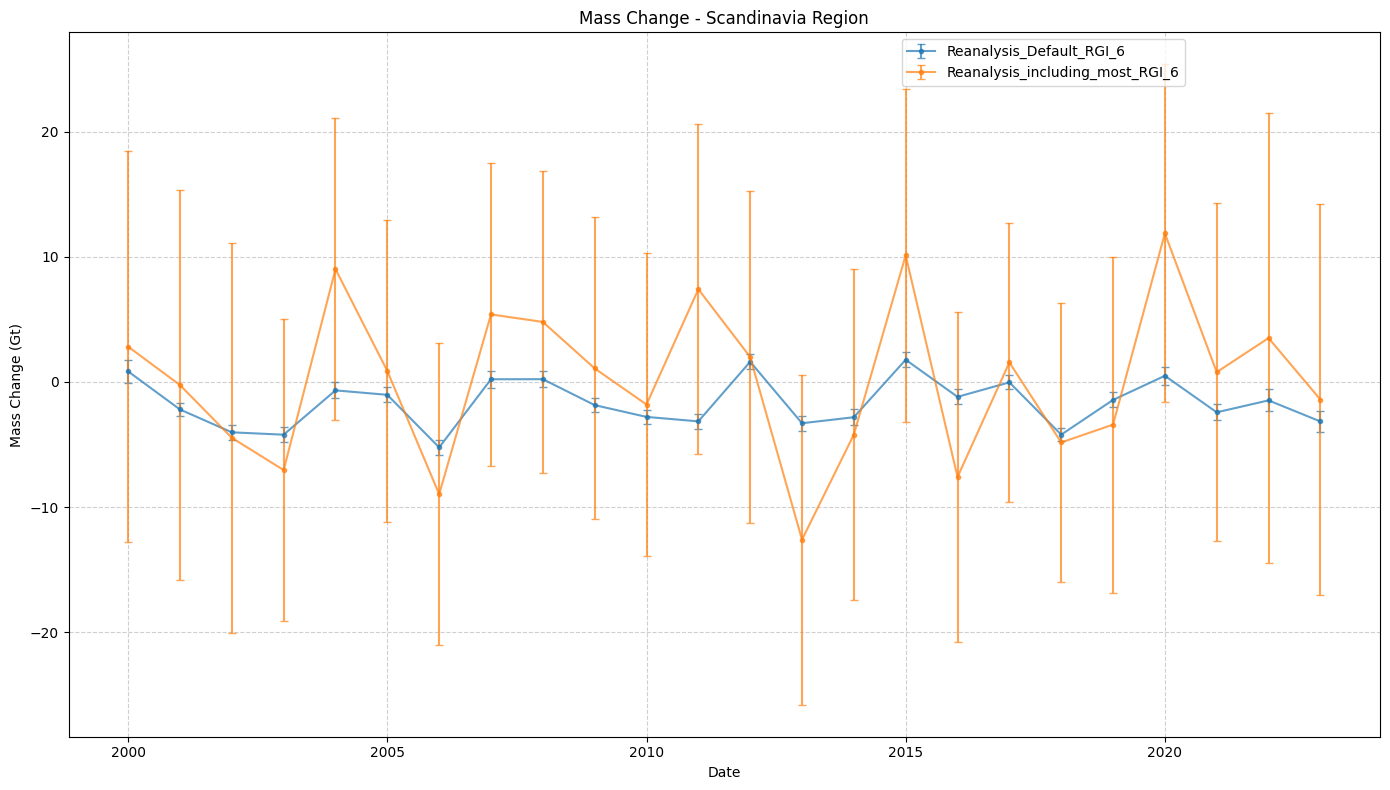

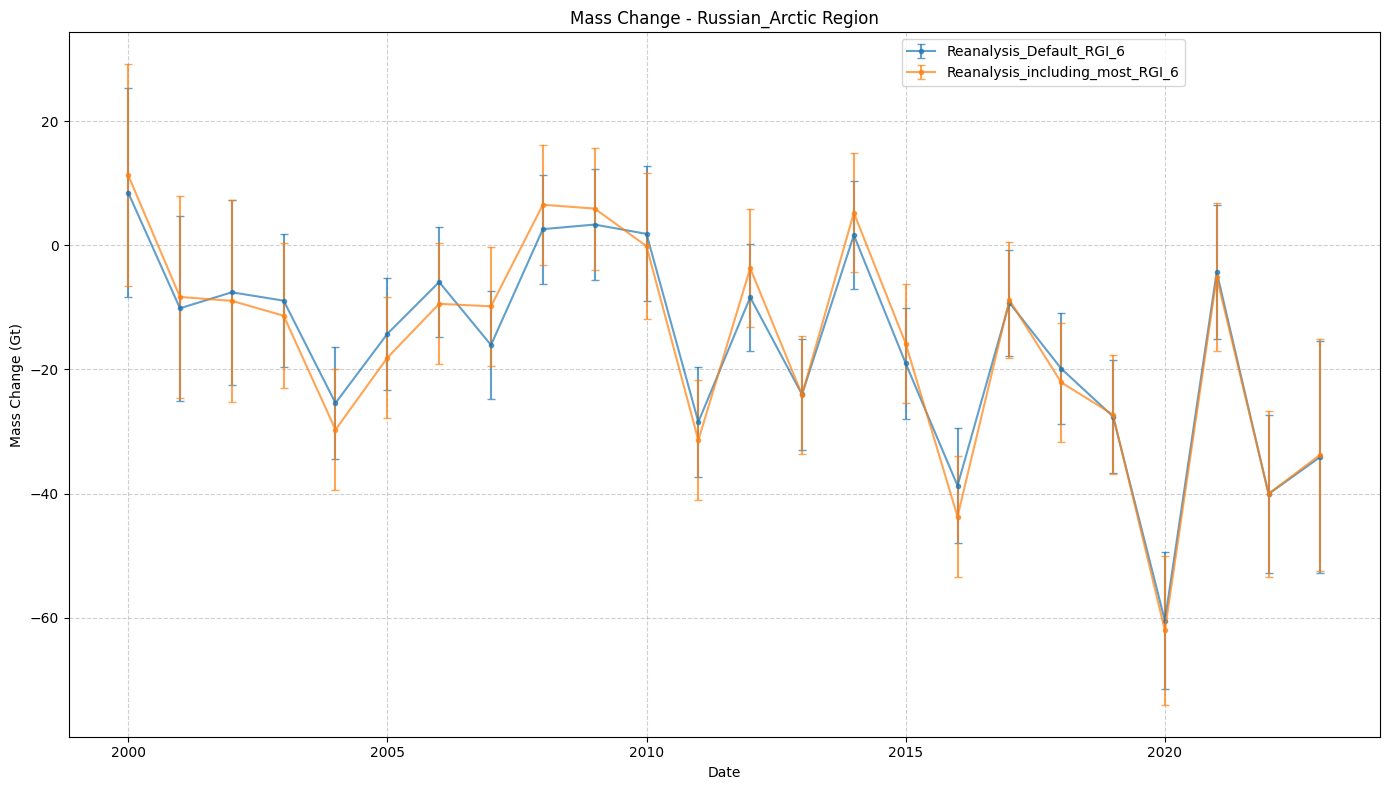

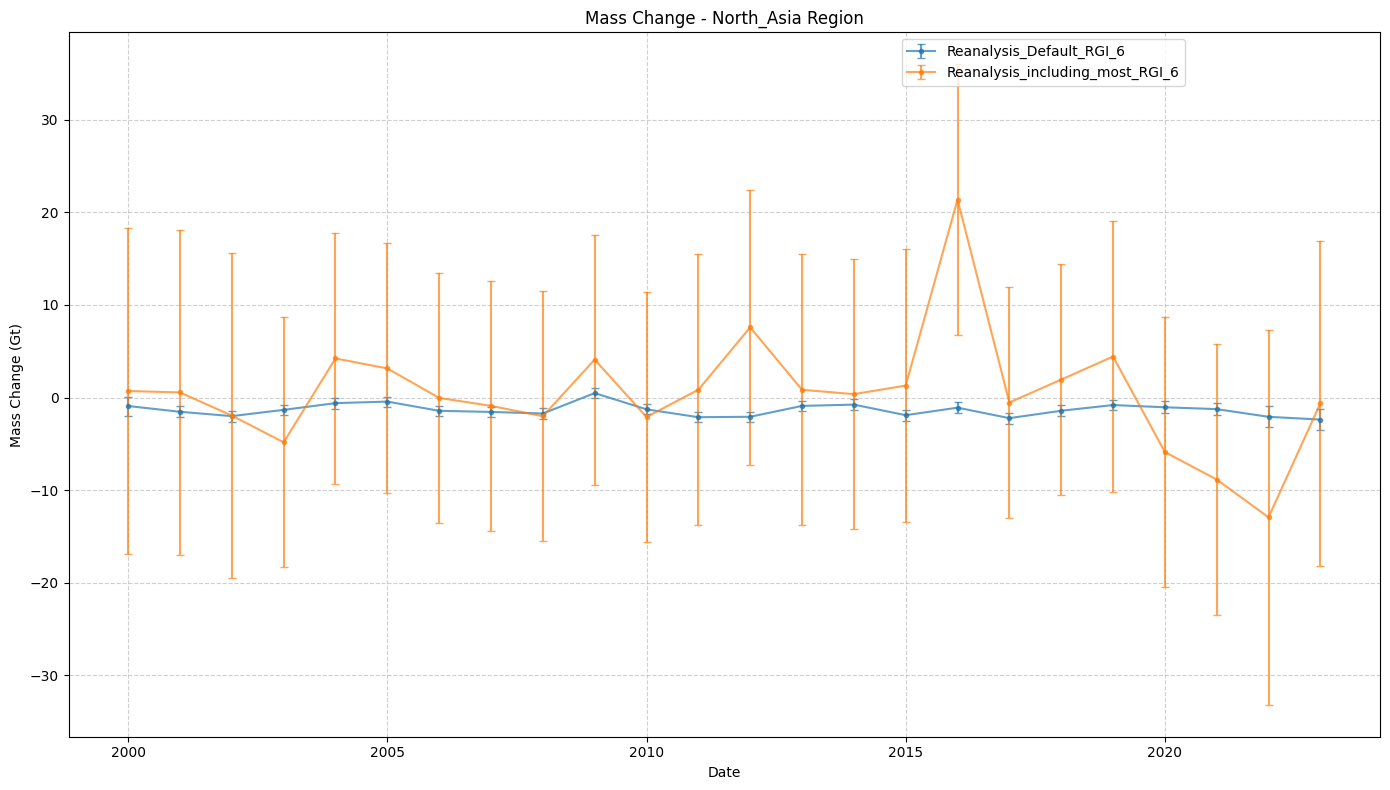

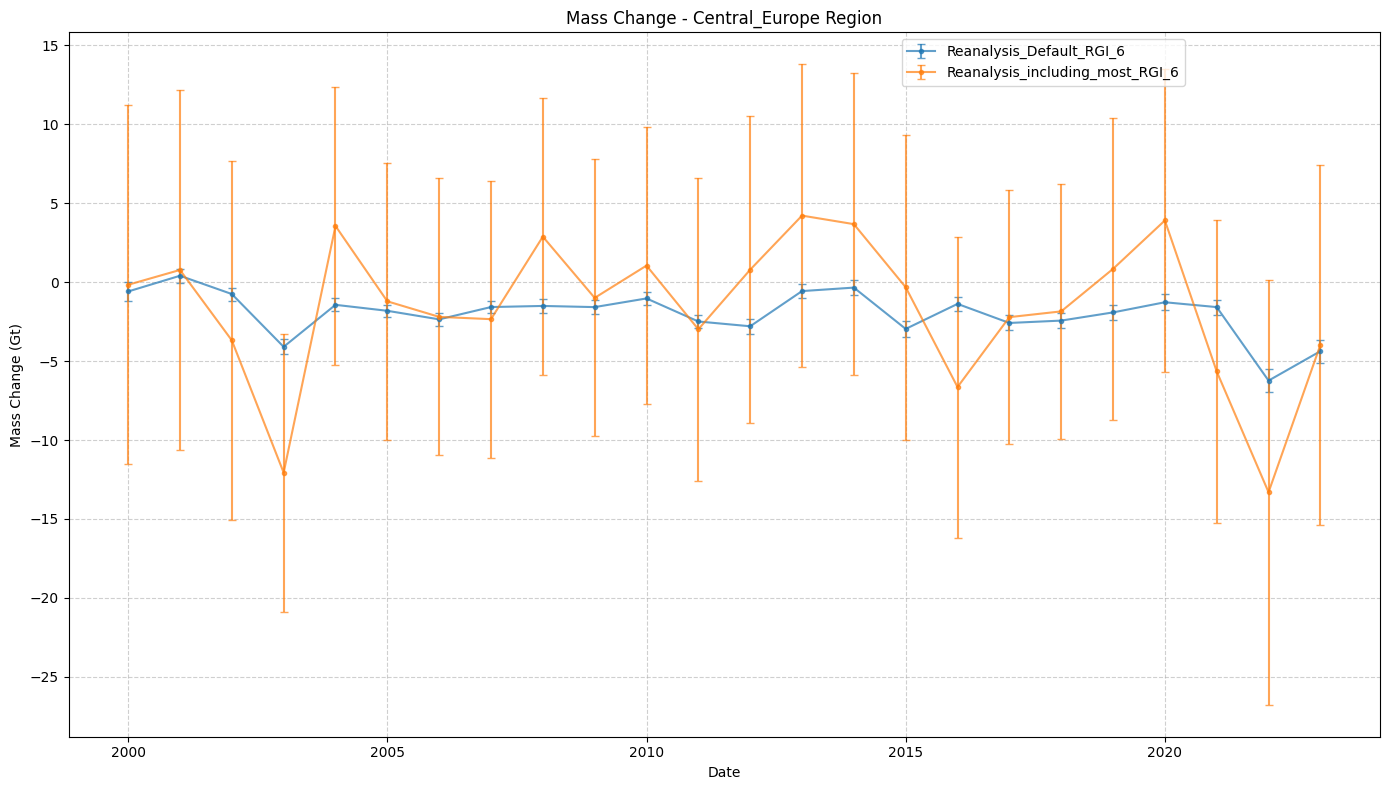

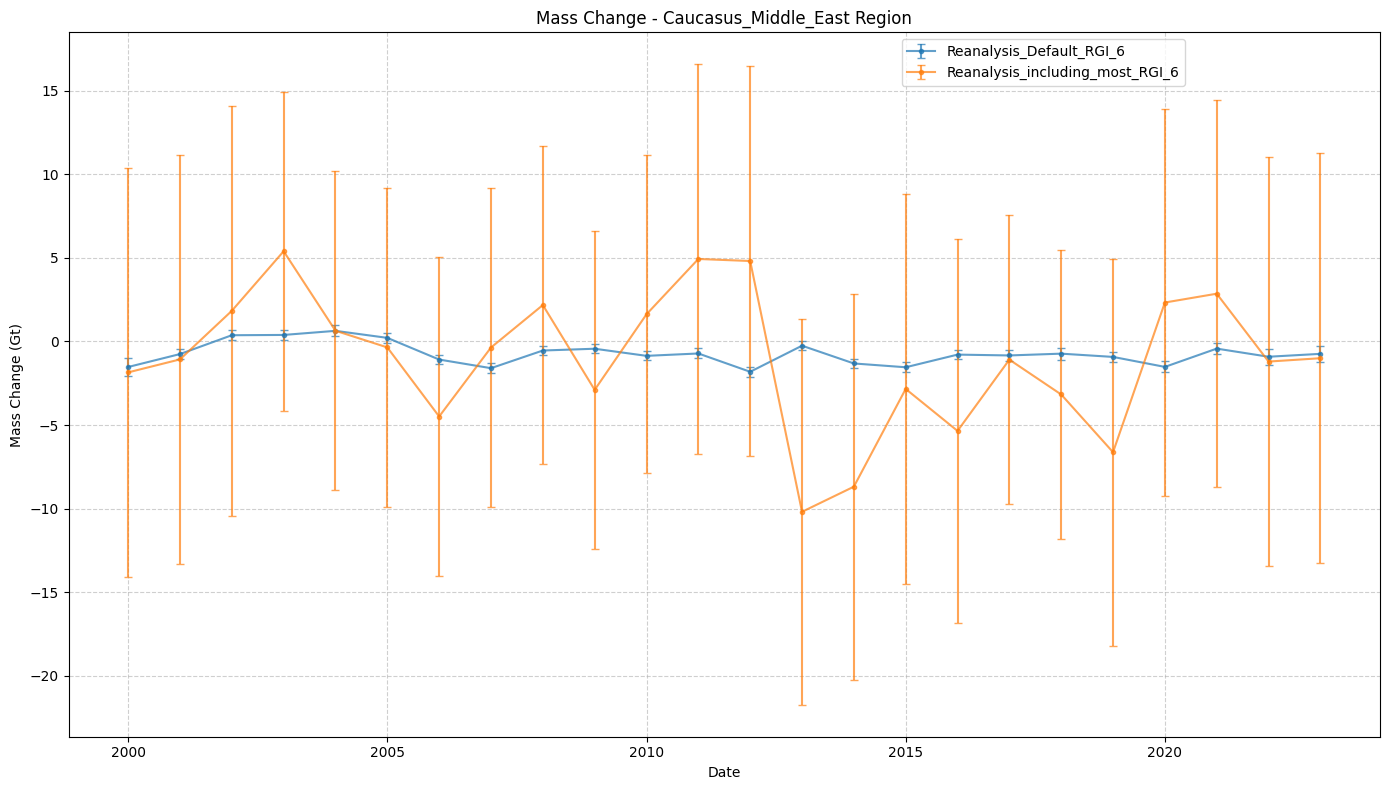

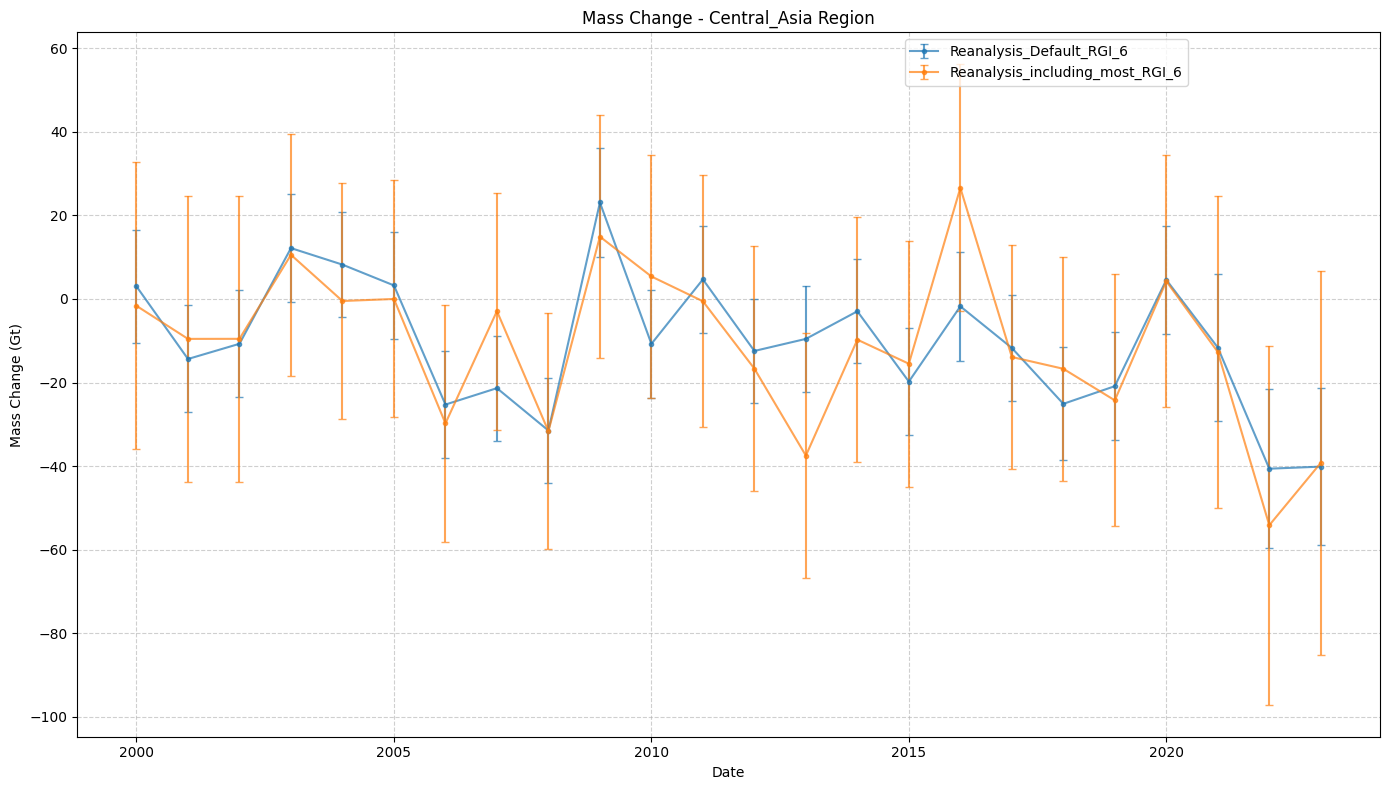

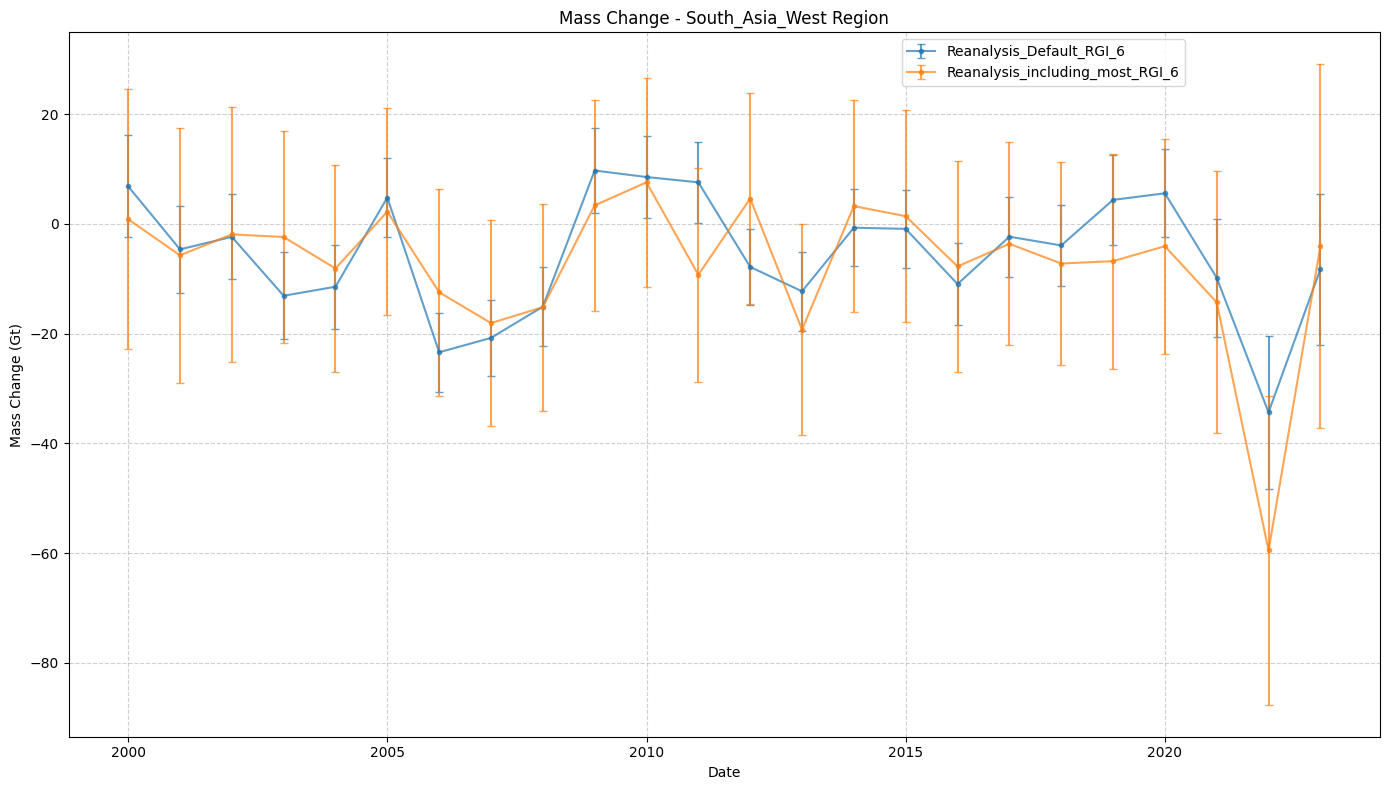

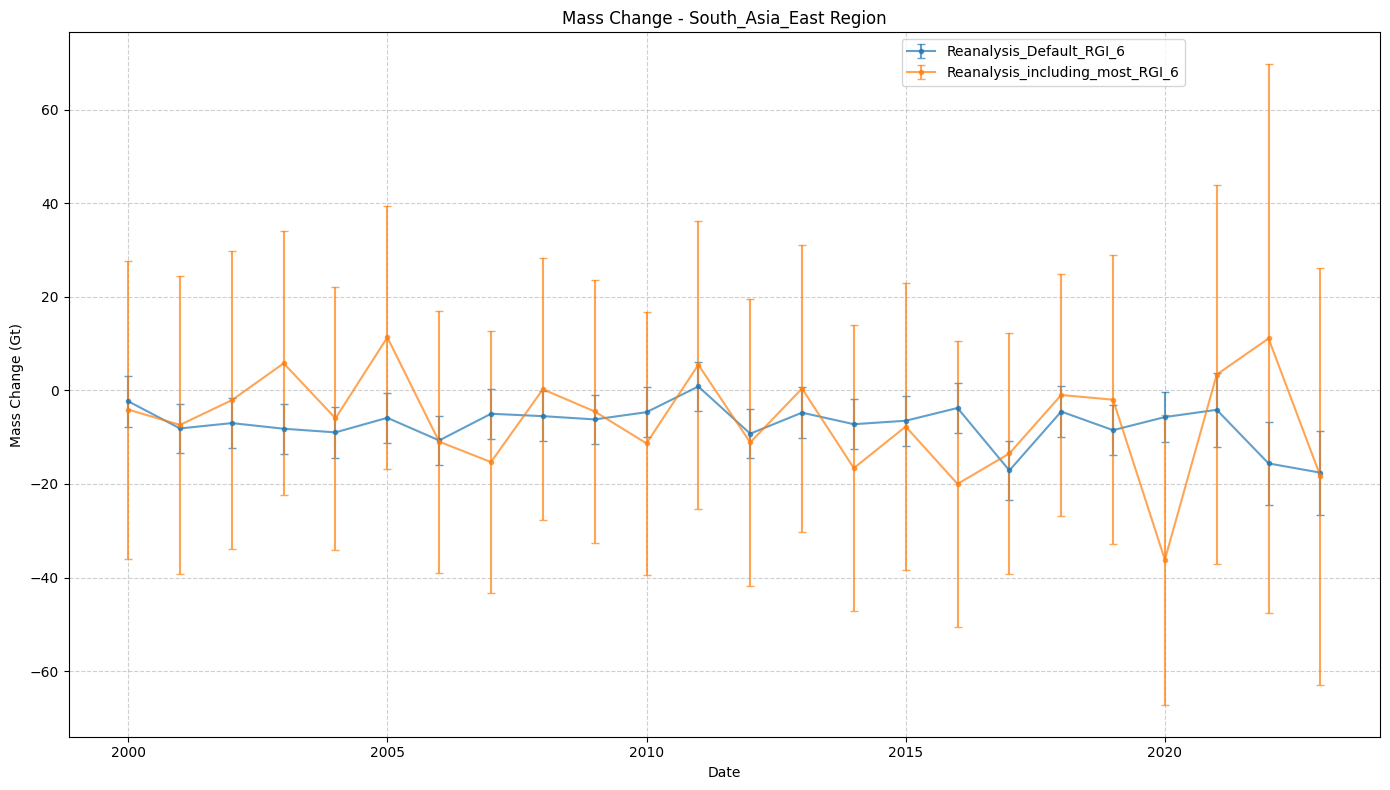

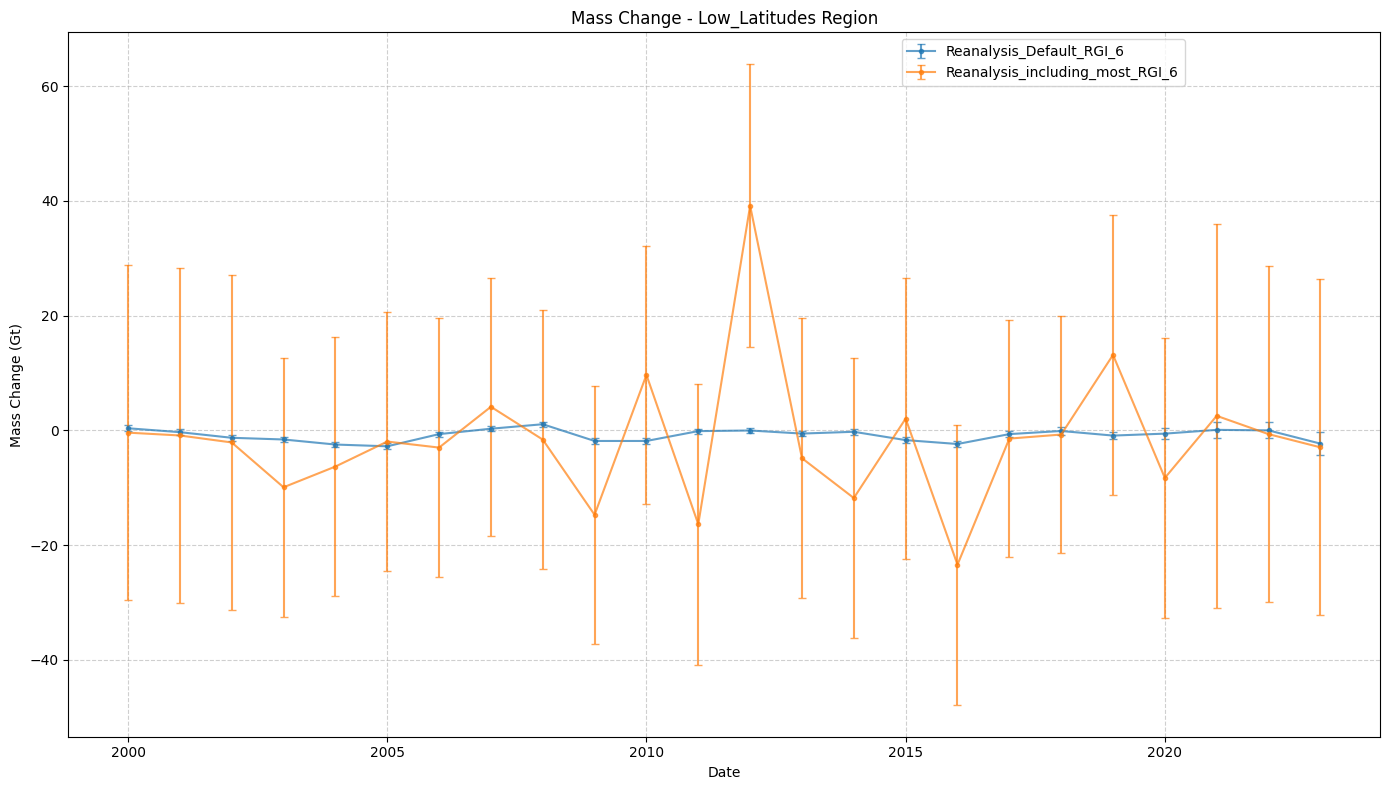

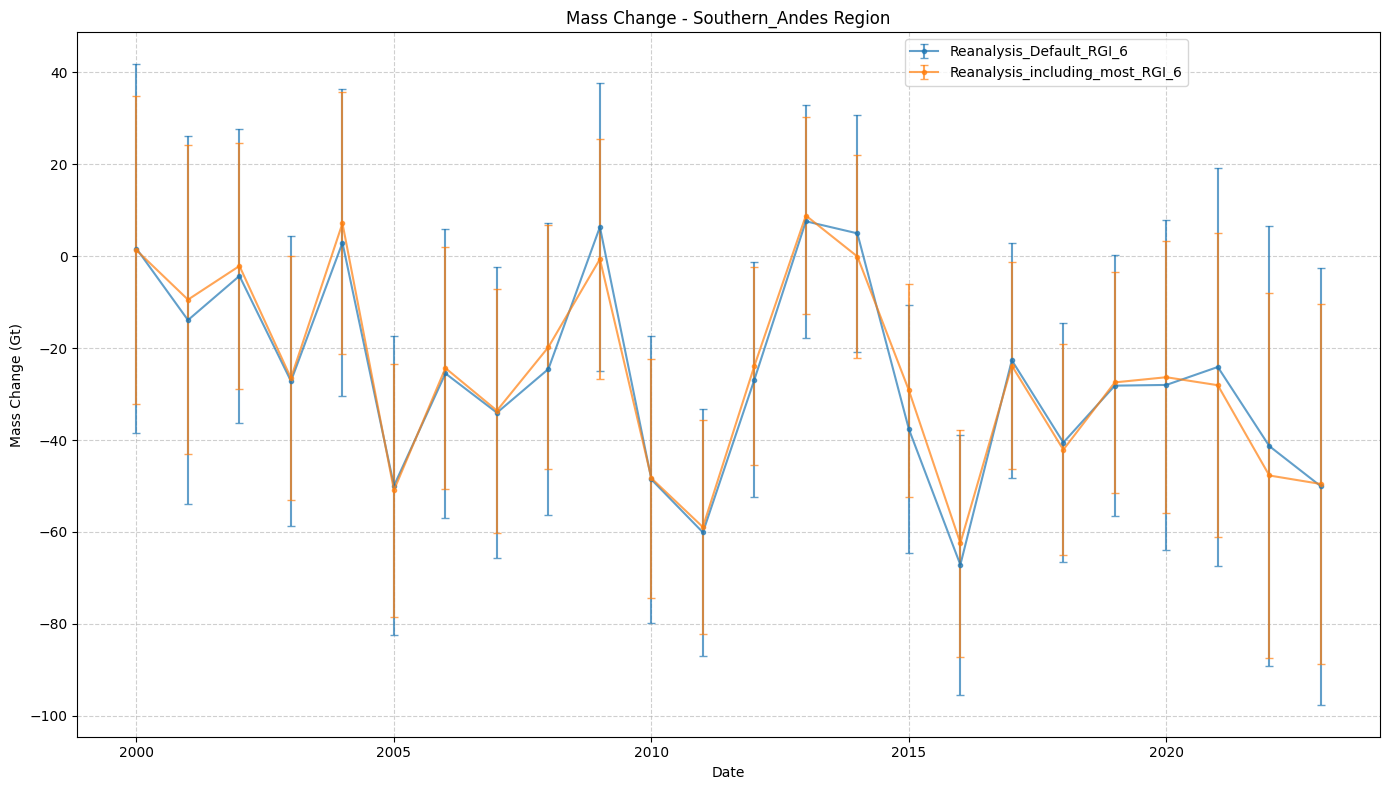

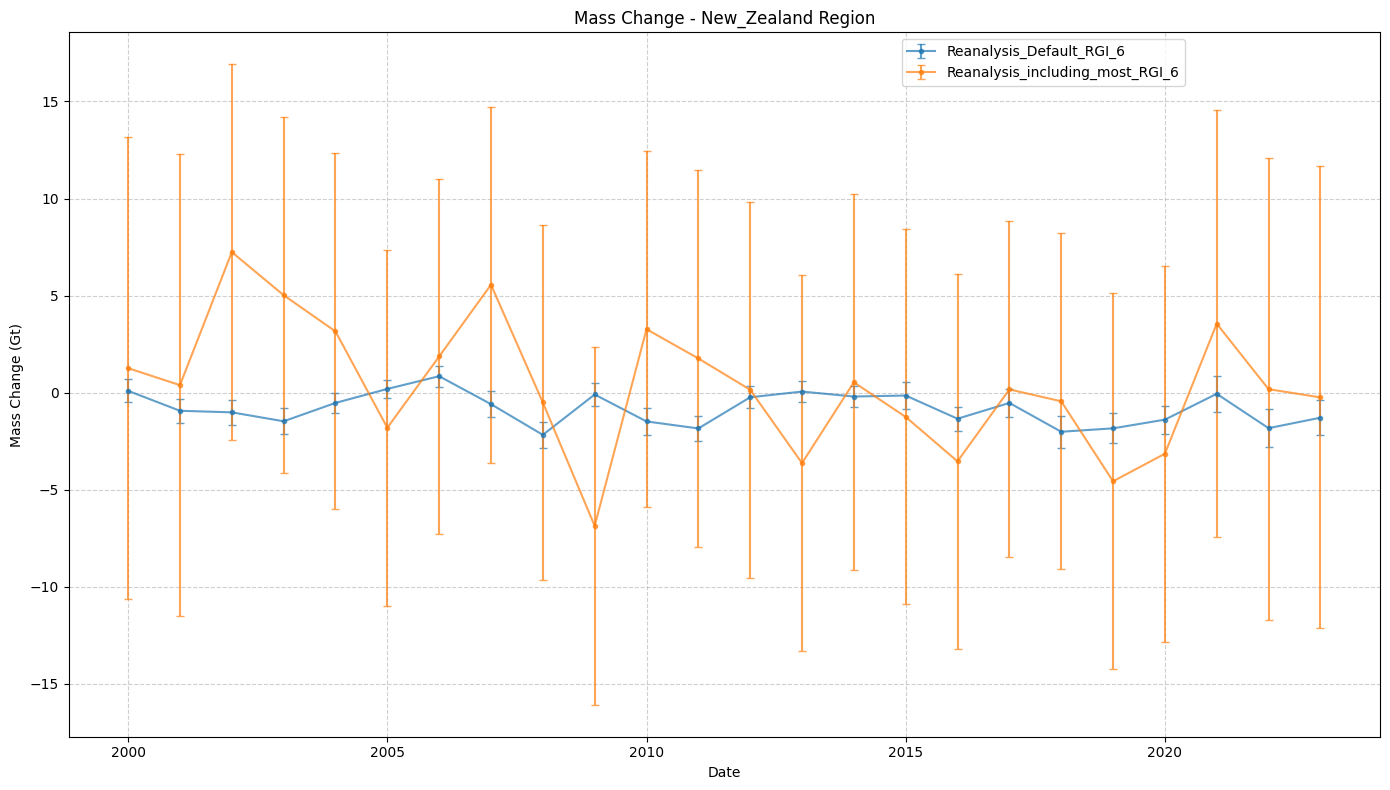

In [6]:
for i in range(1, 19):
    search_pattern = os.path.join('.', 'Reanalysis*', f'{i}_*', 'consensus', 'csvs', 'consensus_calendar_year_gt*.csv')
    
    csv_files = glob.glob(search_pattern)
    
    # Extract region name from the pattern
    region_matches = glob.glob(os.path.join('.', 'Reanalysis*', f'{i}_*'))
    region_name = 'Unknown'
    if region_matches:
        # Extract the folder name like "1_alaska" and get just "alaska"
        folder_name = os.path.basename(region_matches[0])
        region_name = folder_name.split('_', 1)[1] if '_' in folder_name else folder_name
    
    plt.figure(figsize=(14, 8))

    for csv_file in csv_files:
        try:
            df = pd.read_csv(csv_file)
            
            date_col = next((c for c in df.columns if 'date' in c.lower()), df.columns[0])
            change_col = next((c for c in df.columns if 'change' in c.lower()), None)
            error_col = next((c for c in df.columns if 'error' in c.lower()), None)
            
            if change_col and error_col:
                path_parts = os.path.normpath(csv_file).split(os.sep)
                label = next((part for part in path_parts if part.startswith('Reanalysis')), 'Unknown')
                
                plt.errorbar(df[date_col], df[change_col], yerr=df[error_col], 
                            label=label, fmt='.-', capsize=3, alpha=0.7)

        except Exception as e:
            print(f"Could not process {csv_file}: {e}")

    # Use region name in title
    plt.title(f'Mass Change - {region_name.title()} Region')
    plt.xlabel('Date')
    plt.ylabel('Mass Change (Gt)')
    plt.legend(bbox_to_anchor=(0.63, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()